In [ ]:
!pip install pandas matplotlib scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [36]:
# Synthetic dataset (500 hours, 3 zones)
ts = pd.date_range("2025-01-01", periods=500, freq="h")
df = pd.DataFrame({
    "ts": ts,
    "zone": np.random.choice(["Z1", "Z2", "Z3"], len(ts)),
    "demand_mlh": np.random.uniform(50, 200, len(ts))  # demand in ML/h
})

df.to_csv("raw_data.csv", index=False)
print("Raw Data:")
print(df.head())


Raw Data:
                   ts zone  demand_mlh
0 2025-01-01 00:00:00   Z3  192.318575
1 2025-01-01 01:00:00   Z3   90.207078
2 2025-01-01 02:00:00   Z3  171.719891
3 2025-01-01 03:00:00   Z3   58.303973
4 2025-01-01 04:00:00   Z1  130.718152


In [ ]:
# Introduce some NaN values for demo
df.loc[10:15, "demand_mlh"] = np.nan

print("Missing values before filling:")
print(df.isna().sum())

# Fill missing values with interpolation
df["demand_mlh"] = df["demand_mlh"].interpolate()

print("\nMissing values after filling:")
print(df.isna().sum())


Missing values before filling:
ts            0
zone          0
demand_mlh    6
dtype: int64

Missing values after filling:
ts            0
zone          0
demand_mlh    0
dtype: int64


In [ ]:
def make_features(df):
    df = df.copy()
    df["hour"] = df["ts"].dt.hour
    df["dayofweek"] = df["ts"].dt.dayofweek
    df["month"] = df["ts"].dt.month
    return df

df_feat = make_features(df)
print("\nFeature Engineered Data:")
print(df_feat.head())



Feature Engineered Data:
                   ts zone  demand_mlh  hour  dayofweek  month
0 2025-01-01 00:00:00   Z3  106.208296     0          2      1
1 2025-01-01 01:00:00   Z1  132.480284     1          2      1
2 2025-01-01 02:00:00   Z1   57.585966     2          2      1
3 2025-01-01 03:00:00   Z1  113.918186     3          2      1
4 2025-01-01 04:00:00   Z1  174.854531     4          2      1


In [ ]:
scaler = MinMaxScaler()
df_feat["demand_scaled"] = scaler.fit_transform(df_feat[["demand_mlh"]])

print("\nAfter Scaling:")
print(df_feat.head())



After Scaling:
                   ts zone  demand_mlh  hour  dayofweek  month  demand_scaled
0 2025-01-01 00:00:00   Z3  106.208296     0          2      1       0.375548
1 2025-01-01 01:00:00   Z1  132.480284     1          2      1       0.551095
2 2025-01-01 02:00:00   Z1   57.585966     2          2      1       0.050658
3 2025-01-01 03:00:00   Z1  113.918186     3          2      1       0.427065
4 2025-01-01 04:00:00   Z1  174.854531     4          2      1       0.834236


In [ ]:
df_feat.to_csv("preprocessed_data.csv", index=False)
print("✅ Preprocessed data saved as preprocessed_data.csv")


✅ Preprocessed data saved as preprocessed_data.csv


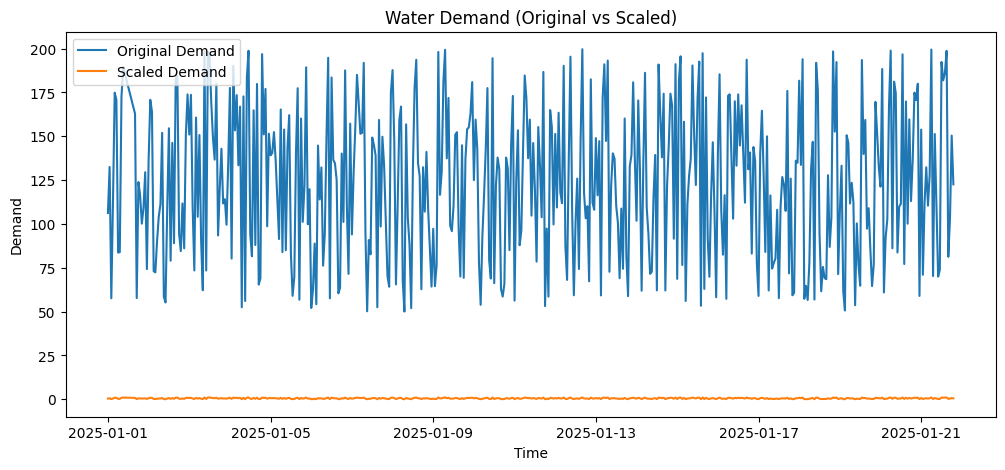

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_feat["ts"], df_feat["demand_mlh"], label="Original Demand")
plt.plot(df_feat["ts"], df_feat["demand_scaled"], label="Scaled Demand")
plt.legend()
plt.title("Water Demand (Original vs Scaled)")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.show()


In [ ]:
df.to_csv("preprocessed_data.csv", index=False)


In [ ]:
from google.colab import files
files.download("preprocessed_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>